Link dataset:  https://www.kaggle.com/datasets/jonnyjackk/college-entrance-exam-scores-in-vietnam-2019?select=diemthi2019.csv
# This is a dataset about test scores that candidates achieved in the college entrance examination for the school year 2019-2020 in Vietnam

### Import libs

In [1]:
# import thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [2]:
# đọc dữ liệu từ file Excel
data = pd.read_csv('E:\CODE KHOA HOC DU LIEU\BAI THI GK MON KHDL\diemthi2019_new.csv')
data.head()

,Unnamed: 0,Dia,GDCD,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Su,Toan,Van,sbd
0,0,7.75,8.75,NaN,NaN,N1,7.6,NaN,8.25,8.2,8.00,24008611
1,1,NaN,NaN,4.5,8.25,N1,8.0,6.0,NaN,8.6,6.17,51000032
2,2,4.25,5.75,NaN,NaN,NaN,NaN,NaN,4.00,5.2,4.75,51000005
3,3,4.75,5.00,NaN,NaN,NaN,NaN,NaN,2.25,4.4,4.50,51000021
4,4,8.25,7.50,NaN,NaN,N1,4.4,NaN,7.75,5.8,6.00,51000013


### Dataset Overview

In [3]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50000 non-null  int64  
 1   Dia               30430 non-null  float64
 2   GDCD              25931 non-null  float64
 3   Hoa               20111 non-null  float64
 4   Li                19821 non-null  float64
 5   Ma_mon_ngoai_ngu  44284 non-null  object 
 6   Ngoai_ngu         44284 non-null  float64
 7   Sinh              19839 non-null  float64
 8   Su                30895 non-null  float64
 9   Toan              49482 non-null  float64
 10  Van               49182 non-null  float64
 11  sbd               50000 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


Nhận xét:
- Tập dữ liệu chỉ chứa toàn các giá trị khác null vì thế không cần xử ý các dữ liệu còn thiếu

### Set background for figure

In [4]:
plt.style.use('seaborn-v0_8')

## Bootstrap function
### Frequency distribution of Toan column
Hàm Bootstrap là hàm tính phân bố lấy mẩu và dải tin cậy của thông số thống kê IQR (inter-quartile range). Với:
- _data là đặc trưng của tập dữ liệu (list)
- n là kích thước của 1 Bootstrap sample (int)
- m là số lượng Bootstrap sample (int)
- x là khoag tin cậy (float)

In [16]:
def Bootstrap(_data, n, m, x):
    # loại bỏ giá trị NaN, để xem dữ liệu bị thiếu ta dùng phương thức isna()
    clean_data = [i for i in _data if pd.isna(i) != True]
    # tạo mảng để lưu giá trị IQR mỗi lần lấy mẫu
    IQR_arr = []
    for i in range(m):
        # lấy n phần tử có thể lặp lại từ clean_data
        sample = np.random.choice(clean_data, n, replace=True)
        # tính độ trãi giữa Q3 - Q1: 
        # Phạm  vi liên vùng  , thường được ký hiệu là “IQR”, là một cách để đo mức độ chênh lệch của 50% ở giữa của tập dữ liệu.
        # Nó được tính bằng sự khác biệt giữa phần tư thứ nhất* (phần trăm thứ 25) và phần tư thứ ba (phần trăm thứ 75) 
        # của tập dữ liệu.
        iqr = np.percentile(sample, 75) - np.percentile(sample, 25)
        IQR_arr.append(iqr)
    # tính dải tin cậy
    alphA = (1 -x) / 2
    upper_bound = np.percentile(IQR_arr, 100 * (1 - alphA)) # cận trên
    lower_bound = np.percentile(IQR_arr, 100 * alphA)       # cận dưới
    #print(f'Confidence interval: [{lower_bound}, {upper_bound}]')
    # vẽ biểu đồ
    plt.axvline(x = upper_bound, linestyle = '--', c = 'r')
    plt.axvline(x = lower_bound, linestyle = '--', c = 'r')
    plt.title('Bootstrap of the IQR of the dataset')
    plt.xlabel('IQR Bootstrap')
    plt.ylabel('Frequency') # tần suất
    return sns.histplot(IQR_arr, kde = True, bins = 25)

#### Gọi hàm Boostrap và in biểu đồ ra màn hình

AxesSubplot(0.125,0.11;0.775x0.77)


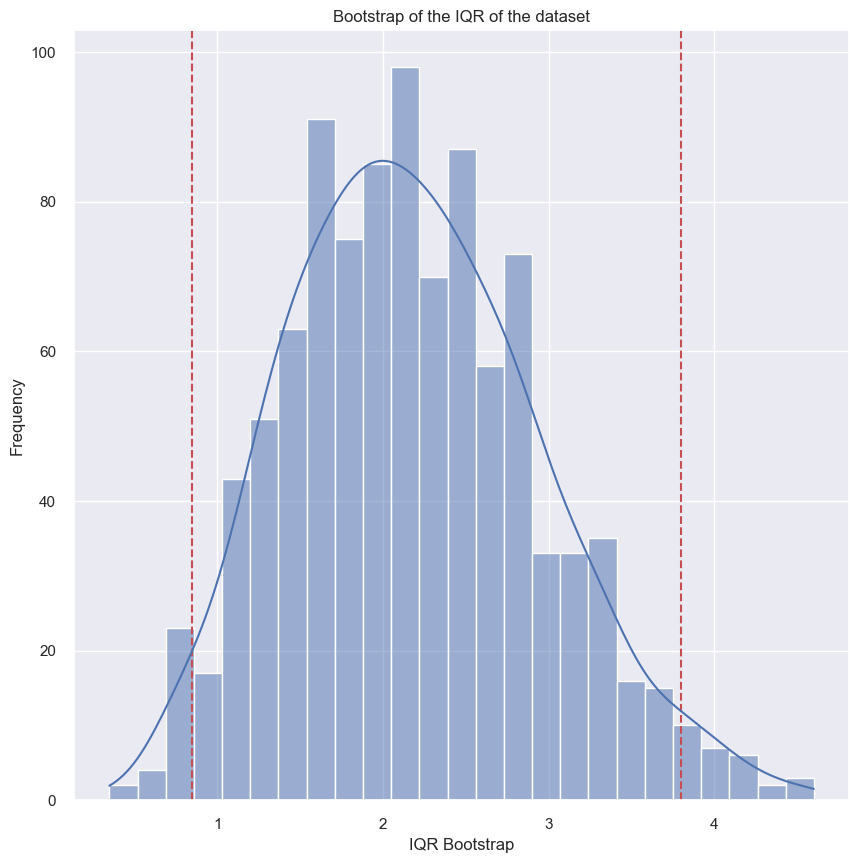

In [17]:
chart = Bootstrap(data['Toan'], 10, 1000, 0.95)
#data['Toan'].value_counts().sort_values(ascending=False)
print(chart)

#### Nhận xét: 
- Đồ thị biểu diễn độ trải giữa của điểm toán năm 2019
- Tập trung chủ yếu từ 1.4 đến 2.6, trải từ 0.4 đến 5, trung bình tương đương 2
- Có dạng hình chuông của phân phối chuẩn
- Điểm có độ trãi giữa tương đối cao => Điểm thấp điểm cao đếu có

#### Vẽ biểu đồ histogram thể hiện điểm của tất cả 9 môn thi

[(0.0, 18000.0)]

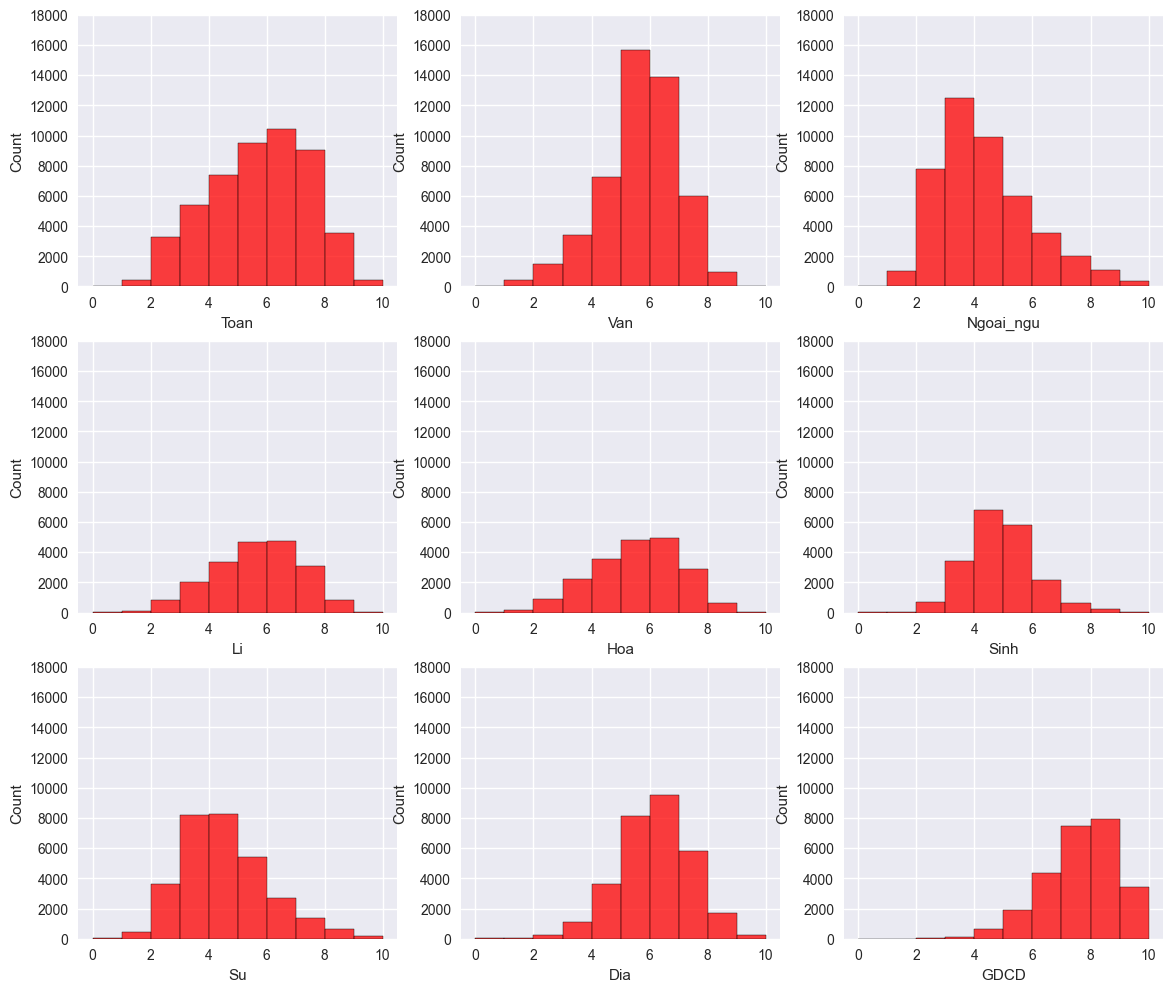

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(12)
fig.set_figwidth(14)
sns.histplot(data['Toan'], bins=10, binrange=(0,10), color='red', ax=axes[0,0]).set(ylim=(0, 18000))
sns.histplot(data['Van'], bins=10, binrange=(0,10), color='red', ax=axes[0,1]).set(ylim=(0, 18000))
sns.histplot(data['Ngoai_ngu'], bins=10, binrange=(0,10), color='red', ax=axes[0,2]).set(ylim=(0, 18000))
sns.histplot(data['Li'], bins=10, binrange=(0,10), color='red', ax=axes[1,0]).set(ylim=(0, 18000))
sns.histplot(data['Hoa'], bins=10, binrange=(0,10), color='red', ax=axes[1,1]).set(ylim=(0, 18000))
sns.histplot(data['Sinh'], bins=10, binrange=(0,10), color='red', ax=axes[1,2]).set(ylim=(0, 18000))
sns.histplot(data['Su'], bins=10, binrange=(0,10), color='red', ax=axes[2,0]).set(ylim=(0, 18000))
sns.histplot(data['Dia'], bins=10, binrange=(0,10), color='red', ax=axes[2,1]).set(ylim=(0, 18000))
sns.histplot(data['GDCD'], bins=10, binrange=(0,10), color='red', ax=axes[2,2]).set(ylim=(0, 18000))



#### Nhận xét:
+ Đánh giá chung:
- Toán, Văn, Ngoại ngữ là 3 môn thi bắt buộc nên có số lượng thí sinh tham gia thi cao hơn
- Các thi sinh tham gia tổ hợp khoa học xã hội cao hơn tổ hợp khoa học tự nhiên
- Các môn thi của 2 khối tự nhiên, xã hội có số lượng bằng nhau (mỗi tổ hợp có 3 môn thi).
+ Toán: Điểm có nhiều thí sinh đạt nhiều nhất nằm trong đoạn từ 6 -> 7 điểm, môn toán có điểm 10
+ Văn: Điểm có nhiều thí sinh đạt nhiều nhất nằm trong đoạn từ 5 -> 6 điểm, môn văn không thấy xuất hiện điểm 10
+ Ngoại ngữ: Điểm có nhiều thí sinh đạt nhiều nhất nằm trong đoạn từ 3 -> 4, ngoại ngữ có điểm 10
+ Vật lý: Điểm có nhiều thí sinh đạt nhiều nhất nằm trong đoạn từ 6 -> 7 điểm, vật lý có điểm 10
+ Hóa học: Điểm có nhiều thí sinh đạt nhiều nhất nằm trong đoạn từ 6 -> 7 điểm, có điểm 10
+ Sinh học: Điểm có nhiều thí sinh đạt nhiều nhất nằm trong đoạn từ 4 -> 5 điểm, có điểm 10
+ Sử: Điểm có thí sinh đạt nhiều nhất nằm trong đoạn từ 4 -> 5 điểm, có điểm 10
+ Địa: Điểm có thí sinh đạt nhiều nhất nằm trong đoạn từ 6 -> 7 điểm, có điểm 10
+ GDCD: Điểm có thí sinh đạt cao nhất nằm trong đoạn từ 8 -> 9 điểm, là môn thi có nhiều điểm 10 nhất đa đại đa số các thí sinh tham gia thi GDCD đều đạt từ 5 điểm trở lên, nhìn chung điểm môn GDCD các thí sinh đều đạt điểm tốt.
+ Lịch sử và Ngoại ngữ là 2 môn thi có sơ đồ lệch hẳn về phía trái, đại đa số thí sinh đều làm bài có kết quả dưới trung bình. Báo động về việc các học sinh chưa nắm được kiến thức về lịch sử của dân tộc. Từ đó cần thay đổi các phương pháp dạy học và tiếp cận,..đối với lịch sử và ngoại ngữ


#### Distribution Plot
- Các mã ngoại ngữ và số lượng thí sinh của mã ngoại ngữ đó

N1    44229
N4       45
N6       10
Name: Ma_mon_ngoai_ngu, dtype: int64


<AxesSubplot: xlabel='Ma_mon_ngoai_ngu', ylabel='Count'>

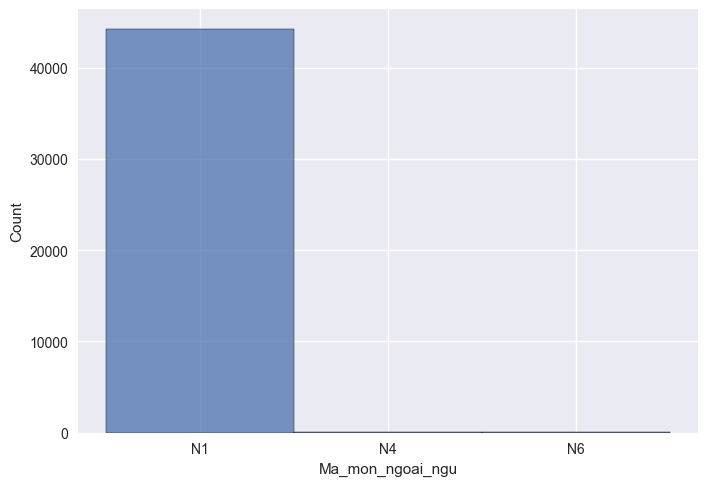

In [8]:
print(data['Ma_mon_ngoai_ngu'].value_counts().sort_values(ascending=False))
sns.histplot(data['Ma_mon_ngoai_ngu'])



Nhận xét:
- vì file dữ liệu diemth2019_new (50000 dòng) cắt từ file diemthi2019 (811852 dòng)
- Nên không xuất hiện các mã ngoại ngữ N2: Tiếng Nga, N5: Tiếng Đức, N3: Tiếng Pháp
- Tiếng Anh chiếm đại đa số, còn lại là tiếng Trung và tiếng Nhật chiếm số lượng rất rất bé so với tiếng anh

# Heatmap
- Heatmap: Trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng
là màu sắc có 2 chiều.
- Heatmap thể hiện sự tương quan giữa điểm số của 9 môn thi

In [9]:
# fields = ['sbd']
# df = data.drop(fields, axis=1)
# df.head()

In [10]:
df = data.corr()
df

C:\Users\logic\AppData\Local\Temp\ipykernel_11372\4236933139.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = data.corr()


,Unnamed: 0,Dia,GDCD,Hoa,Li,Ngoai_ngu,Sinh,Su,Toan,Van,sbd
Unnamed: 0,1.000000,0.030150,0.156175,0.079421,0.052666,0.039210,0.023264,0.019531,0.149152,0.080580,0.116468
Dia,0.030150,1.000000,0.586706,0.214837,0.160730,0.346410,0.347457,0.620215,0.476221,0.500273,0.056758
GDCD,0.156175,0.586706,1.000000,0.097053,0.099297,0.351362,0.247709,0.512394,0.486292,0.463534,0.160118
Hoa,0.079421,0.214837,0.097053,1.000000,0.538085,0.236944,0.454922,0.181127,0.623472,0.264623,0.018587
Li,0.052666,0.160730,0.099297,0.538085,1.000000,0.377407,0.250027,0.190002,0.662101,0.254352,-0.009517
Ngoai_ngu,0.039210,0.346410,0.351362,0.236944,0.377407,1.000000,0.287410,0.345318,0.556387,0.394859,0.227247
Sinh,0.023264,0.347457,0.247709,0.454922,0.250027,0.287410,1.000000,0.272984,0.403323,0.265636,0.057900
Su,0.019531,0.620215,0.512394,0.181127,0.190002,0.345318,0.272984,1.000000,0.436348,0.474116,0.019385
Toan,0.149152,0.476221,0.486292,0.623472,0.662101,0.556387,0.403323,0.436348,1.000000,0.507941,0.257688
Van,0.080580,0.500273,0.463534,0.264623,0.254352,0.394859,0.265636,0.474116,0.507941,1.000000,0.111862


In [11]:
df.shape, df.shape

((11, 11), (11, 11))

C:\Users\logic\AppData\Local\Temp\ipykernel_11372\3471392573.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Blues', alpha=1, linewidths=1, fmt='.2f') #YlGnBu


<AxesSubplot: >

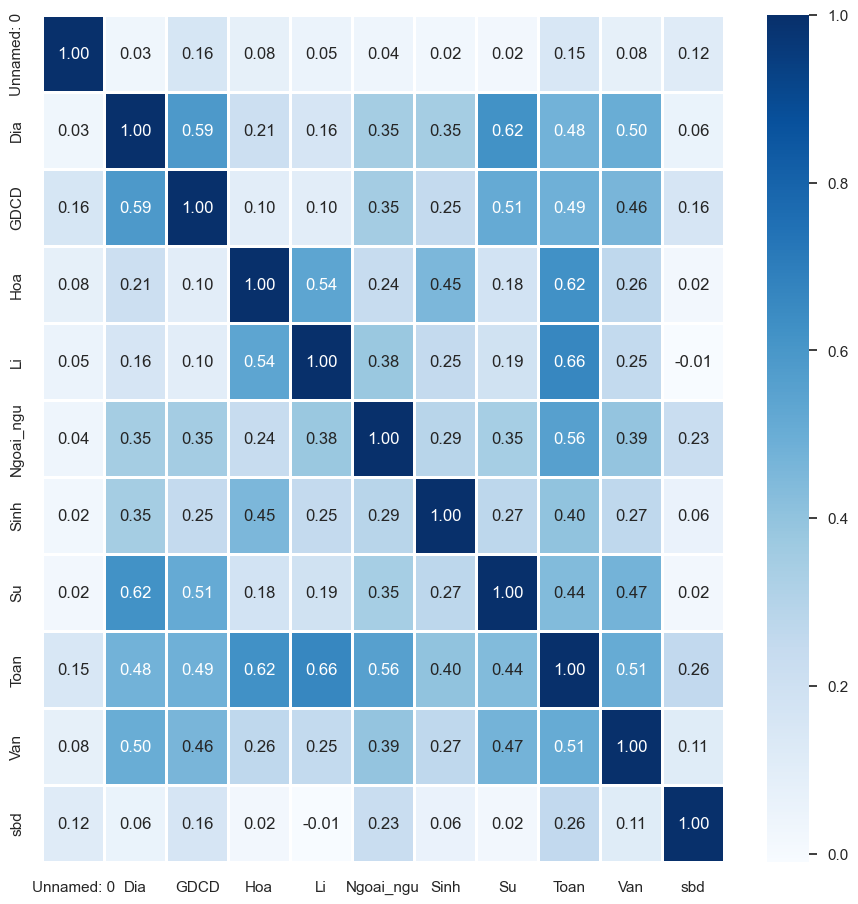

In [12]:
sns.set(rc={'figure.figsize':(11,11)})
sns.heatmap(data.corr(), annot=True, cmap='Blues', alpha=1, linewidths=1, fmt='.2f') #YlGnBu
# data.corr(): get correlation data: lấy dữ liệu tương quan
# annot = True: in các giá trị tương quan lên các ô
# fmt = '.2f': làm tròn các giá trị tương quan vs 2 số thập phân sau dấu chấm

- Màu đậm thể hiện sự tương quan cao, nhạt là thấp (từ đậm xuống nhạt là thấp dần)
- Toán có độ tương quan khá cao với các môn khác, đặc biệt với hóa và vật lý
- Các môn trong cùng khối thi thì có độ tương quan cao hơn
- Ngược lại khác khối thi thì tương quan rất thấp
#### Cụ thể:
- Môn Địa có điểm tương quan cao nhất với môn Sử, cao thứ 3 với văn vì nằm trong khối C (văn, sử, địa), cao nhì với GDCD (khối A09: Toán, địa, gdcd).
- GDCD có điểm tương quan cao nhất với Địa, nhì với sử,..
- Hóa có điểm tương quan cao nhất với Toán, nhì với vật lý. 3 môn này nằm trong tổ hợp khối A có đông đảo các thí sinh tham dự
- Lý có điểm tương quan cao nhất với Toán, nhì với Hóa. Khối A
- Ngoại ngữ có điểm tương quan cao nhất với Toán, nhì với văn. Khối D có đông đảo lượng thí sinh tham gia dự thi
- Sinh có điểm tương quan cao nhất với Hóa, nhì với Toán. Khối B (Toán, hóa, sinh) có đông đảo thí sinh tham dự
- Sử có điểm tương quan cao nhất với Địa, nhì GDCD, thứ 3 là văn
- Toán có độ tương quan cao nhất với lý và hóa
- Văn có độ tương quan cao nhất với Toán, địa lý.


### Scatter Plot
- Biểu đồ scatter plot: biểu đồ phân tán thể hiện quan hệ tương quan của điểm văn và toán

<AxesSubplot: xlabel='Toan', ylabel='Van'>

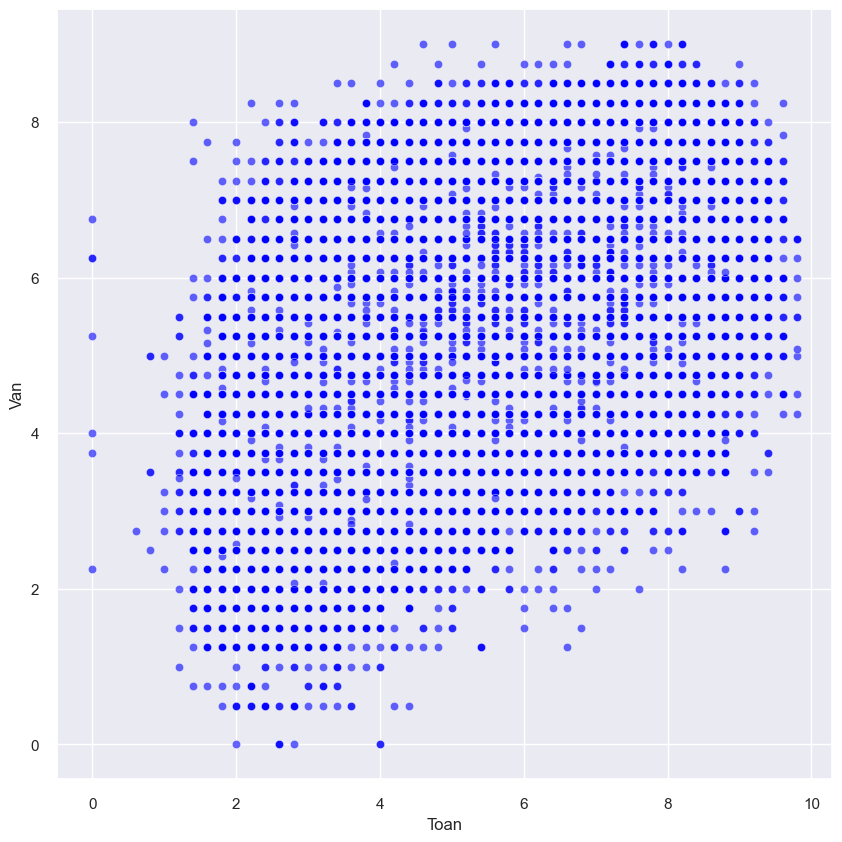

In [13]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.scatterplot(x='Toan', y='Van', data=data, color='blue', alpha=.6)



- Phân bố đồng đều, tập trung nhiều hơn từ khoảng điểm 4.5 -> 7.5
- Tuyến tính
- Điểm tăng đều thể hiện sự đồng đều trong học tập của thí sinh ở phương diện tự nhiên và xã hội
- => Bác bỏ ý kiến: 'giỏi toán thì dở văn, giỏi văn thì dở toán'

# **Kết luận**
- Điểm thi thpt quốc gia năm 2019 cơ bản đánh giá được chất lượng thí sinh, cũng như phân loại các thí sinh
- Không có tình trạng mưa điểm 10
- Đa số các môn thi số lượng thí sinh tham gia môn thi đó đều trên điểm trung bình
+ Tuy nhiên:
- Tình trạng điểm thấp vẫn diễn ra ở 2 môn lịch sử và ngoại ngữ (đặc biệt là tiếng anh)
